<a href="https://colab.research.google.com/github/userkaren2003/datamusic/blob/main/Proyecto_medio_semestre_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
Nombre = "\"Karen Martinez\"" #@param {type:"string"}
Nombre = "\"Dominic Alejandra Guerra Montalvo\"" #@param {type:"string"}
Clase = "ADM-3080" #@param {type:"string"}
NRC = "4068" #@param {type:"string"}
Fecha = "2023-11-20"#@param {type:"date"}

# 1. Introducción

### a. Descripción del proyecto

El proyecto de medio semestre se enfoca en la comparación de las preferencias musicales entre las ciudades de Springfield y Shelbyville, permitiéndonos validar hipótesis y extraer conclusiones significativas a partir de la información recopilada. Para ello, utilizamos los datos proporcionados por Y.Music y el análisis de datos aplicando los conocimientos adquiridos en el curso, así como utilizar la biblioteca principal para el procesamiento de datos, Pandas.

**Hipótesis a probar :**

1. La actividad de los usuarios difiere según el día de la semana y dependiendo de la ciudad.
2. Los lunes por la mañana, los habitantes de Springfield y Shelbyville escuchan diferentes géneros. Lo
mismo ocurre con los viernes por la noche.
3. Los oyentes de Springfield y Shelbyville tienen distintas preferencias. En Springfield prefieren el pop
mientras que en Shelbyville hay más aficionados al rap.




---



# 2. Descripción de los datos

`userID` — identificador del usuario

`Track` — título de la pista

`artist` — nombre del artista

`genre` — género

`City` — ciudad del usuario (Shelbyville y Springfield)

`time` — el periodo de tiempo exacto en que se reprodujo la pista

`Day` — día de la semana

### a. Librearías utilizadas

`Pandas`: Nos permitirá cargar, limpiar, filtrar y realizar operaciones en la base de datos.

`NumPy`: Esta libreria nos ayudará a realizar cálculos numéricos y operaciones matemáticas con los datos.

`Missingno`: Nos permite visualizar patrones de valores faltantes en los datos y determinar la cantidad y ubicación de los valores faltantes en las columnas.Esto nos ayudara a saber cómo manejar los valores faltantes, como imputarlos o eliminarlos.

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import missingno as msno

### b. Datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importar datos
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/music_project_en.csv')

### c. Exploración de datos

In [5]:
# Verificar cuántas filas y columnas tiene nuestra base de datos
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


(65079, 7)

### d. Primeros y últimos datos

In [6]:
# Primeros datos
data.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday


In [7]:
# Ultimos datos
data.tail()

,userID,Track,artist,genre,City,time,Day
65074,729CBB09,My Name,McLean,rnb,Springfield,13:32:28,Wednesday
65075,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hip,Shelbyville,10:00:00,Monday
65076,C5E3A0D5,Jalopiina,NaN,industrial,Springfield,20:09:26,Friday
65077,321D0506,Freight Train,Chas McDevitt,rock,Springfield,21:43:59,Friday
65078,3A64EF84,Tell Me Sweet Little Lies,Monica Lopez,country,Springfield,21:59:46,Friday


### e. Tipos de datos

Después de este breve análisis consideramos necesario ajustar algunos aspectos de los nombres de las columnas y asi prevenir problemas en la interpretación y el procesamiento de los datos.

Debemos corregir la disparidad en la capitalización y los espacios que se observaron en algunos de los nombres de las columnas.


### f. Conclusiones iniciales

Nuestra base de datos tiene un total de 65,079 filas y 7 columnas.

Los tipos de datos de las columnas son principalmente del tipo object, eso significa que la mayoría de las variables se almacenan como cadenas de texto. Sin embargo, no podemos realizar cálculos numéricos con facilidad si no se convierten algunos de estos datos a tipos numéricos adecuados, por ejemplo, se recomienda que la columna "time" se convierta en tipo datetime.

Las columnas "Track," "artist," y "genre" tienen valores nulos ("NaN") ya que tienen menos filas que las otras columnas, estos valores ausentes deben ser tratados para continuar con las pruebas de hipótesis.






---



# 3. Preprocesamiento de datos

### a. Cambio de encabezados

Se debe corregir los encabezados, ya que algunos títulos incluyen mayúsculas mientras que otros son títulos completamente minúsculos.

In [8]:
print(data.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


In [9]:
# Renombrar las columnas
data = data.rename(
    columns = {
        '  userID':'user_id',
        'Track':'track',
        '  City  ':'city',
        'Day':'day'
    }
)

In [10]:
print(data.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


###b. Identificación y transformación de valores ausentes

**Gráfico de datos ausentes :**

<Axes: >

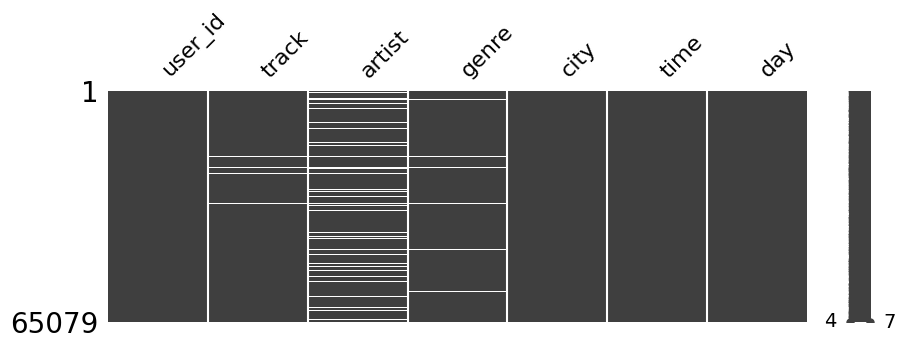

In [11]:
width = 10
height = 3

msno.matrix(data, figsize=(width, height))

Se identificaron valores ausentes en las columnas `track`, `artist`, `genre`

<Axes: >

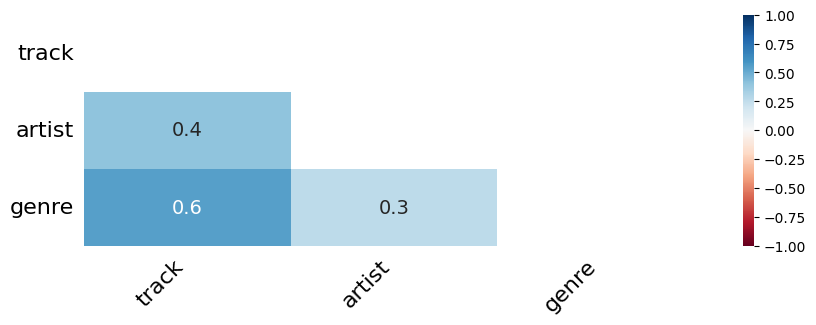

In [12]:
# Correlacion entre las columnas
width = 10
height = 3

msno.heatmap(data, figsize=(width, height))

In [13]:
# Cantidad de valores ausentes en numero
print(data.isna().sum())
print('')
print(data.columns[data.isnull().any()])

user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
dtype: int64

Index(['track', 'artist', 'genre'], dtype='object')


In [14]:
# Cantidad de valores ausentes en porcentaje
for col in data.columns:

    porcentaje_ausente = np.mean(data[col].isnull()) * 100

    print(f"Columna {col}: {porcentaje_ausente:.2f}%")


Columna user_id: 0.00%
Columna track: 2.06%
Columna artist: 11.63%
Columna genre: 1.84%
Columna city: 0.00%
Columna time: 0.00%
Columna day: 0.00%


**Análisis de valores ausentes:**

Existen valores ausentes en las siguientes columnas:

`Track` - 1343 o 2.06%

`artist` - 7567 o 11.63%

`genre` -  1198 o 1.84%

Los valores `Track` y `artist` no son significativos para el análisis de las hipótesis, ya que no son necesarios para comprobar las hipótesis y representan un número muy bajo de los datos totales (65,709). Sin embargo, no se deben eliminar, ya que se demuestra una correlación alta entre las variables previamente mencionadas, lo cual puede afectar a los datos no ausentes debido a que la ausencia no es simétrica. La pérdida de estos datos probablemente fue consequencia de errores de registro. En el caso de 'Track', podría ser que algunos usuarios no proporcionaron información sobre el título de la canción al escucharla. Para 'Artist', puede ser que haya usuarios que estén escuchando música de artistas menos conocidos o nuevos, lo que podría llevar a la falta de información sobre el artista. Para 'Genre', los usuarios podrían escuchar música que no está clasificada en un género específico o podría ser información opcional que algunos usuarios no proporcionan.
Para solucionar esto, se deben reemplazar los datos ausentes con "undefined".


--> Aunque la variable `genre` muestra un porcentaje bajo de datos ausentes, es un valor de gran importancia, ya que es necesario para el análisis de las hipótesis que compara los gustos entre las dos ciudades.

**Completar datos ausentes :**

Este código recorrerá las columnas especificadas en columns_to_replace y reemplazará los valores ausentes con 'unknown' en el DataFrame original data .

In [15]:
# Usar un bucle for y la función fillna
columns_remplazar = ['track', 'artist', 'genre']

for column in columns_remplazar:
    data[column] = data[column].fillna('undefined')

In [16]:
# Comprobar que ya no hay valores ausentes
print(data.isna().sum())

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


In [17]:
print(data.info)

<bound method DataFrame.info of         user_id                              track            artist  \
0      FFB692EC                  Kamigata To Boots  The Mass Missile   
1      55204538        Delayed Because of Accident  Andreas Rönnberg   
2        20EC38                  Funiculì funiculà       Mario Lanza   
3      A3DD03C9              Dragons in the Sunset        Fire + Ice   
4      E2DC1FAE                        Soul People        Space Echo   
...         ...                                ...               ...   
65074  729CBB09                            My Name            McLean   
65075  D08D4A55  Maybe One Day (feat. Black Spade)       Blu & Exile   
65076  C5E3A0D5                          Jalopiina         undefined   
65077  321D0506                      Freight Train     Chas McDevitt   
65078  3A64EF84          Tell Me Sweet Little Lies      Monica Lopez   

            genre         city      time        day  
0            rock  Shelbyville  20:28:33  Wednesd

###C. Reemplazo de datos

Cambiar la variable 'time' porque no está en el formato datetime

In [18]:
# Usar la funcion datetime de pandas
data['time'] = pd.to_datetime(data['time'],errors = 'coerce')
print(data.dtypes)

user_id            object
track              object
artist             object
genre              object
city               object
time       datetime64[ns]
day                object
dtype: object


### d. Eliminación de datos duplicados

Se analizó la presencia de datos duplicados generales.

In [19]:
# Encontrar el numero de datos duplicados con la funcion duplicated
print(data.duplicated().sum())

3826


In [20]:
# Borrar datos duplicados
data = data.drop_duplicates().reset_index(drop=True)

In [21]:
# Verificar la eliminacion de los datos duplicados
print(data.duplicated().sum())

0


In [22]:
print(data.info)

<bound method DataFrame.info of         user_id                              track            artist  \
0      FFB692EC                  Kamigata To Boots  The Mass Missile   
1      55204538        Delayed Because of Accident  Andreas Rönnberg   
2        20EC38                  Funiculì funiculà       Mario Lanza   
3      A3DD03C9              Dragons in the Sunset        Fire + Ice   
4      E2DC1FAE                        Soul People        Space Echo   
...         ...                                ...               ...   
61248  729CBB09                            My Name            McLean   
61249  D08D4A55  Maybe One Day (feat. Black Spade)       Blu & Exile   
61250  C5E3A0D5                          Jalopiina         undefined   
61251  321D0506                      Freight Train     Chas McDevitt   
61252  3A64EF84          Tell Me Sweet Little Lies      Monica Lopez   

            genre         city                time        day  
0            rock  Shelbyville 2023-11-

Examinar cuidadosamente los datos para identificar posibles redundancias o errores tipográficos que podrían afectar la interpretación y análisis en la columna `genre`.

In [23]:
# Encontrar los valores unicos de la columna genre
print(data['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'ambient' 'americana' 'animated' 'anime' 'arabesk' 'arabic' 'arena'
 'argentinetango' 'art' 'audiobook' 'avantgarde' 'axé' 'baile' 'balkan'
 'beats' 'bigroom' 'black' 'bluegrass' 'blues' 'bollywood' 'bossa'
 'brazilian' 'breakbeat' 'breaks' 'broadway' 'cantautori' 'cantopop'
 'canzone' 'caribbean' 'caucasian' 'celtic' 'chamber' 'children' 'chill'
 'chinese' 'choral' 'christian' 'christmas' 'classical' 'classicmetal'
 'club' 'colombian' 'comedy' 'conjazz' 'contemporary' 'country' 'cuban'
 'dance' 'dancehall' 'dancepop' 'dark' 'death' 'deep' 'deutschrock'
 'deutschspr' 'dirty' 'disco' 'dnb' 'documentary' 'downbeat' 'downtempo'
 'drum' 'dub' 'dubstep' 'eastern' 'easy' 'electronic' 'electropop' 'emo'
 'entehno' 'epicmetal' 'estrada' 'ethnic' 'eurofolk' 'european'
 'experimental' 'extrememetal' 'fado' 'film' 'fitness' 'flamenco' 'folk'
 'folklore' 'folkmetal' 'folkrock' 'folktronica' 'forró' 'frankreich'
 'französisch' 

Notamos que el género hip hop tiene errores tipográficos o malas entradas, es decir, duplicados implícitos, ya que representan esencialmente la misma categoría, pero debido a diferencias en la entrada, el sistema los trata como diferentes géneros.

In [24]:
# Crear una función para corregir los nombres incorrectos

def replace_wrong_genres(wrong_genres,correct_genre):
    for wrong_value in wrong_genres:
        data['genre'] = data['genre'].replace(wrong_value,correct_genre)

In [25]:
# Definir los nombres de la columna "genre" correctos e incorrecto

wrong_genres = ['hip', 'hop', 'hip-hop']
correct_genre = 'hiphop'

replace_wrong_genres(wrong_genres,correct_genre)

In [26]:
# Verificar la eliminación de los datos duplicados específicos
print(data['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'ambient' 'americana' 'animated' 'anime' 'arabesk' 'arabic' 'arena'
 'argentinetango' 'art' 'audiobook' 'avantgarde' 'axé' 'baile' 'balkan'
 'beats' 'bigroom' 'black' 'bluegrass' 'blues' 'bollywood' 'bossa'
 'brazilian' 'breakbeat' 'breaks' 'broadway' 'cantautori' 'cantopop'
 'canzone' 'caribbean' 'caucasian' 'celtic' 'chamber' 'children' 'chill'
 'chinese' 'choral' 'christian' 'christmas' 'classical' 'classicmetal'
 'club' 'colombian' 'comedy' 'conjazz' 'contemporary' 'country' 'cuban'
 'dance' 'dancehall' 'dancepop' 'dark' 'death' 'deep' 'deutschrock'
 'deutschspr' 'dirty' 'disco' 'dnb' 'documentary' 'downbeat' 'downtempo'
 'drum' 'dub' 'dubstep' 'eastern' 'easy' 'electronic' 'electropop' 'emo'
 'entehno' 'epicmetal' 'estrada' 'ethnic' 'eurofolk' 'european'
 'experimental' 'extrememetal' 'fado' 'film' 'fitness' 'flamenco' 'folk'
 'folklore' 'folkmetal' 'folkrock' 'folktronica' 'forró' 'frankreich'
 'französisch' 

### e. Conclusiones del Preprocesamiento de datos

--> Se realizó un cambio en los encabezados para facilitar el procesamiento de la tabla  

--> Existen valores ausentes en las columnas `track`, `artist` y `genre`, los cuales han sido reemplazados con 'undefined'

--> Se eliminaron los datos duplicados para que los resultados sean más precisos



*   Se debe tener un enfoque en la columna `genre` con el fin de determinar si sus datos ausentes afectan a nuestra investigación





---



# 4. Prueba de Hipótesis

### a. Hipótesis 1 : La actividad de los usuarios difiere según el día de la semana y dependiendo de la ciudad

Se evaluará la actividad del usuario en cada ciudad agrupando los datos por ciudad y encontrando el número de canciones reproducidas en cada grupo.

In [27]:
# Dividir a los usuarios en grupos por ciudad
canciones_por_ciudad = data.groupby('city')['track'].count()
print(canciones_por_ciudad)

city
Shelbyville    18512
Springfield    42741
Name: track, dtype: int64


In [28]:
# Pistas reproducidas por cada día
pistas_por_dia = data.groupby('day')['track'].count()
print(pistas_por_dia)

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64


Se observa que el miércoles fue el día que menos pistas resproducen, sin embargo, si consideramos cada ciudad por separado los resultados pueden ser distintos.
A continuación, creamos una función con día y ciudad como parámetros para calcular el número de canciones reproducidas en determinado día y ciudad.

La función `numero_de_tracks` primero recupera las filas del día deseado, después filtra las filas de la ciudad deseada, encuentra el número de valores de 'user_id' en la tabla filtrada y devuelve ese número.

In [29]:
# Agrupación de datos por ciudad y día
def numero_de_tracks(day, city):
    track_list = data[(data['day'] == day) & (data['city'] == city)]
    conteo_track_list = track_list['user_id'].count()
    return conteo_track_list

In [30]:
# Lunes - Springfield
numero_de_tracks('Monday', 'Springfield')

15740

In [31]:
# Lunes - Shelbyville
numero_de_tracks('Monday', 'Shelbyville')

5614

In [32]:
# Miercoles - Springfield
numero_de_tracks('Wednesday', 'Springfield')

11056

In [33]:
# Miércoles - Shelbyville
numero_de_tracks('Wednesday', 'Shelbyville')

7003

In [34]:
# Viernes - Springfield
numero_de_tracks('Friday', 'Springfield')

15945

In [35]:
# Viernes - Shelbyville
numero_de_tracks('Friday', 'Shelbyville')

5895

In [36]:
# Crear una tabla para visualizar agrupación
data = {
    'city': ['Springfield', 'Shelbyville'],
    'monday': [15740, 5614],
    'wednesday': [11056, 7003],
    'friday': [15945, 5895]
}

In [37]:
tabla_de_ciudades = pd.DataFrame(data)
tabla_de_ciudades.style.format({'monday': '{:,}', 'wednesday': '{:,}', 'friday': '{:,}'})

,city,monday,wednesday,friday
0,Springfield,"15,740","11,056","15,945"
1,Shelbyville,"5,614","7,003","5,895"


**Conclusiones de hipótesis 1:**

Sí se comprueba la hipótesis número 1, ya que:



*   En Springfield, los días lunes y viernes tienen mayor actividad por parte de los usuarios  
*   En Shelbyville, el día con mayor actividad de los usuarios es miércoles

En general, Springfield supera a Shelbyville, ya que demuestra valores de actividad más elevados en todos los días



### b. Hipótesis 2: Los lunes por la mañana, los habitantes de Springfield y Shelbyville escuchan diferentes géneros. Lo mismo ocurre con los viernes por la noche

Obtenemos una tabla que contenga unicamente los valores de una ciudad y le asignamos una variable para Springfield y Shelbyville.

In [38]:
filtro_springfield = data['city'] == 'Springfield'
filtro_spr = data.loc[filtro_springfield].reset_index(drop=True)
print(filtro_spr)

AttributeError: ignored

In [ ]:
filtro_shelbyville = data['city'] == 'Shelbyville'
filtro_shel = data.loc[filtro_shelbyville].reset_index(drop=True)
print(filtro_shel)

Creamos una función que devuelva información de los 15 géneros más populares de un día determinado en un período entre dos marcas de fecha y hora

In [ ]:
# Crear una funcion para devolver información sobre los géneros más populares de un determinado día y hora
def genre_weekday(data, day, time1, time2):
    genre_data = data[data['day'] == day]
    genre_data = genre_data[genre_data['time'] < time2]
    genre_data = genre_data[genre_data['time'] < time1]

    # agrupar el DataFrame filtrado por la columna con los nombres de los géneros, toma la columna de género, y encuentra el número de filas por cada género con el método count()
    genre_data_grouped = genre_data.groupby('genre')['genre'].count()

    # ordenaremos el resultado en orden descendente (por lo que los géneros más populares aparecerán primero en el objeto Series)
    genre_data_sorted = genre_data_grouped.sort_values(ascending = False)

    # devolver el objeto Series que almacena los 15 géneros más populares en un día determinado en un periodo de tiempo determinado
    return genre_data_sorted[:15]


Usamos la función `genre_weekday()` para Springfield y Shelbyville el lunes por la mañana (de 7 a 11) y el viernes por la tarde (de 17:00 a 23:00)

In [ ]:
# llamando a la función para el lunes por la mañana en Springfield (utilizando spr_general en vez de la tabla df)

genre_weekday(filtro_spr, 'Monday', '7:00', '11:00')

In [ ]:
# llamando a la función para el lunes por la mañana en Springfield (utilizando spr_general en vez de la tabla df)

genre_weekday(filtro_shel, 'Monday', '7:00', '11:00')

In [ ]:
# Viernes por la tarde - Springfield
genre_weekday(filtro_spr, 'Friday', '17:00', '23:00')

In [ ]:
# Viernes por la tarde - Shelbyville
genre_weekday(filtro_shel, 'Friday', '17:00', '23:00')

**Conclusión: Hipótesis 2**

Habiendo comparado los 15 géneros más populares del lunes por la mañana podemos concluir lo siguiente:

1. Los usuarios de Springfield y Shelbyville escuchan música similar. Los **cinco géneros más populares son los mismos**, solo rock y electrónica han intercambiado posiciones.

2. En Springfield el número de valores ausentes resultaron ser tan altos que el valor `'unknown'` llegó al décimo. Esto significa que los valores ausentes forman una parte considerable de los datos, lo que podría ser la base de la cuestión sobre la fiabilidad de las conclusiones.

Para el viernes por la tarde, la situación es similar. Los géneros individuales varían algo pero, en general, los 15 más populares son parecidos en las dos ciudades.

De esta forma, la segunda hipótesis ha sido parcialmente demostrada:
* Los usuarios escuchan música similar al principio y al final de la semana.
* No hay una gran diferencia entre Springfield y Shelbyville. En ambas ciudades, el pop es el género más popular.

Sin embargo, el número de valores ausentes hace este resultado un tanto cuestionable. En Springfield, hay tantos que afectan a nuestros 15 más populares. De no faltarnos esos valores, las cosas podrían parecer diferentes.

### c. Hipótesis 3: Los oyentes de Springfield y Shelbyville tienen distintas preferencias. En Springfield prefieren el pop mientras que en Shelbyville hay más aficionados al rap

In [ ]:
filtro_spr = filtro_spr.groupby('genre')['genre'].count().sort_values(ascending = False)
# imprimiendo las 10 primeras filas de spr_genres
print(filtro_spr.head(10))

In [ ]:
filtro_shel = filtro_shel.groupby('genre')['genre'].count().sort_values(ascending = False)
# imprimiendo las 10 primeras filas de shel_genres
print(shelbyville_genres.head(10))

**Conclusión: Hipótesis 3**
La hipótesis ha sido parcialmente demostrada:
* La música pop es el género más popular en Springfield, tal como se esperaba.
* Sin embargo, en Shelbyville el rap no estaba entre uno de los géneros favoritos, al contrario la música pop resultó ser igual de popular que en Springfield.

Por lo tanto, rechazamos la hipótesis

# 5. Conclusiones

En este proyecto buscamos responder a las siguientes hipótesis:

1. La actividad de los usuarios varía según el día de la semana y las diferentes ciudades.
2. Los lunes por la mañana, los residentes de Springfield y Shelbyville escuchan géneros musicales diferentes. Lo mismo ocurre los viernes por la noche.
3. Los oyentes de Springfield y Shelbyville tienen preferencias musicales distintas, siendo el pop el género preferido en ambas ciudades.

Después de analizar los datos, podemos concluir lo siguiente:

1. La actividad de los usuarios en Springfield y Shelbyville varía según el día de la semana, aunque las ciudades presentan diferencias en la forma en que esto sucede, por lo tanto, aceptamos la primera hipótesis.

2. Las preferencias musicales no varían significativamente a lo largo de la semana en Springfield y Shelbyville, sin embargo, podemos observar pequeñas diferencias los lunes, pero en general, la música pop es lo más escuchado en ambas ciudades.
Por lo tanto, rechazamos esta hipótesis. Además, es importante tener en cuenta que los resultados podrían haber sido diferentes si no hubiera habido valores ausentes en los datos.

3. Se observó que las preferencias musicales de los usuarios de Springfield y Shelbyville son bastante similares.

Por lo tanto, la tercera hipótesis es rechazada, ya que si hay alguna diferencia en las preferencias, no se puede observar en los datos analizados.

# 6. Bibliografía

* Pandas.DataFrame.fillna — Pandas 2.1.3 documentation. (s. f.). https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

* Pandas DataFrame Duplicated() method. (s. f.). https://www.w3schools.com/python/pandas/ref_df_duplicated.asp